# Proyecto Final: Librería FinCal

Programacion II

Programa de Estudios Superiores

Banco de Guatemala

# Integrantes:

Marianna Guzmán 

Joaquín Gordillo Sajbín 

Luis Lemus Mackay

In [ ]:
graphics.off(); rm(list=ls());
ls()

# FinCal

Es un paquete para el cálculo del valor del dinero en el tiempo, análisis de series temporales y finanzas computacionales.

LIBRERÍA A UTILIZAR

FinCal está disponible en [CRAN] (http://cran.r-project.org/web/packages/FinCal/) 


In [1]:
install.packages("FinCal",dependencies=TRUE)
library("FinCal")

Installing package into 'C:/Users/IN_CAP02/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'FinCal' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\IN_CAP02\AppData\Local\Temp\RtmpsB5cEQ\downloaded_packages


La librería también se puede descargar directamente desde GitHub

In [2]:
library("devtools")
install_github("felixfan/FinCal") 

Loading required package: usethis




rlang   (0.4.2 -> 0.4.4) [CRAN]
stringi (1.4.4 -> 1.4.5) [CRAN]
vctrs   (0.2.1 -> 0.2.2) [CRAN]


Installing 3 packages: rlang, stringi, vctrs

Installing packages into 'C:/Users/Luis Mackay/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There are binary versions available but the source versions are later:
        binary source needs_compilation
rlang    0.4.2  0.4.4              TRUE
stringi  1.4.4  1.4.5              TRUE

package 'vctrs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis Mackay\AppData\Local\Temp\RtmpGug5Hh\downloaded_packages


installing the source packages 'rlang', 'stringi'




ERROR: Error: Failed to install 'FinCal' from GitHub:
  (convertido del aviso) installation of package 'rlang' had non-zero exit status


FinCal cuenta con múltiples funciones. Para ver el listado o repertorio de las mismas, se puede utilizar el siguiente comando

In [4]:
ls("package:FinCal")

[1] "bdy"                   "bdy2mmy"               "candlestickChart"     
 [4] "cash.ratio"            "coefficient.variation" "cogs"                 
 [7] "current.ratio"         "ddb"                   "debt.ratio"           
[10] "diluted.EPS"           "discount.rate"         "ear"                  
[13] "ear.continuous"        "ear2bey"               "ear2hpr"              
[16] "EIR"                   "EPS"                   "financial.leverage"   
[19] "fv"                    "fv.annuity"            "fv.simple"            
[22] "fv.uneven"             "geometric.mean"        "get.ohlc.google"      
[25] "get.ohlc.yahoo"        "get.ohlcs.google"      "get.ohlcs.yahoo"      
[28] "gpm"                   "harmonic.mean"         "hpr"                  
[31] "hpr2bey"               "hpr2ear"               "hpr2mmy"              
[34] "irr"                   "irr2"                  "iss"                  
[37] "lineChart"             "lineChartMult"         "lt.d2e"               
[40] "mmy2hpr"               "n.period"              "npm"                  
[43] "npv"                   "pmt"                   "pv"                   
[46] "pv.annuity"            "pv.perpetuity"         "pv.simple"            
[49] "pv.uneven"             "quick.ratio"           "r.continuous"         
[52] "r.norminal"            "r.perpetuity"          "sampling.error"       
[55] "SFRatio"               "Sharpe.ratio"          "slde"                 
[58] "total.d2e"             "twrr"                  "volumeChart"          
[61] "was"                   "wpr"

Para obtener ayuda con alguna de las funciones se pueden emplear los siguientes comandos 

In [5]:
help(pv)    # display the documentation for the function
args(pv)    # see arguments of the function
example(pv) # see example of using the function

function (r, n, fv = 0, pmt = 0, type = 0) 
NULL


pv> pv(0.07,10,1000,10)
[1] -578.5851

pv> pv(r=0.05,n=20,fv=1000,pmt=10,type=1)
[1] -507.7427


Este link es una especie de manual o diccionario de todas la funciones https://cran.r-project.org/web/packages/FinCal/FinCal.pdf

A continuación se proporciona un ejemplo de algunas de las funciones empleando estos comandos. Se acompañan con una breve descripción en español.

Nota: Para todos los ejemplos los ingresos son positivos mientras que los egresos negativos. 

# Rendimiento de descuento bancario (BDY): 

La tasa de descuento bancario (o Discount Bank Yield en inglés) es una de las formas en las que se puede presentar la rentabilidad de un título de mercado monetario emitido al descuento.

Este descuento es la diferencia entre el precio de cotización y el valor nominal del título anualizado.

Cuando se adquiere un instrumento de mercado monetario emitido al descuento, el vendedor estipula la cantidad que será reembolsada al vencimiento y el comprador paga un precio menor. La diferencia entre esos dos precios sería lo que ganaría el inversor. Pero si calculamos así la rentabilidad, no estaríamos obteniendo una rentabilidad anualizada, que es la que se suele utilizar para medir la rentabilidad de estos activos.

Su fórmula es la siguiente RBD=(D/F)*(360/t)

Rbd = Rentabilidad anualizada utilizando la tasa de descuento bancaria.

D= Descuento sobre el valor nominal (se obtiene de restar al valor facial el precio de cotización del instrumento)

F= Valor facial del título.

t= Días hasta el vencimiento del título.

In [6]:
#help("bdy")    
args(bdy)    
example(bdy)

function (d, f, t) 
NULL


bdy> bdy(d=1500,f=100000,t=120)
[1] 0.045


Ejemplo: Se nos requiere calcular la tasa de descuento bancario de un bono cupón cero emitido al descuento. El precio del bono es de 978,5 € con un valor facial de 1.000 € y éste vence en 135 días.

In [7]:
bdy(d=1000-978.5, f=1000, t=135)

[1] 0.05733333

# Convirtiendo el RDB a Rendimiento del mercado monetario (MMY)

El rendimiento del mercado monetario es la tasa de rendimiento de las inversiones altamente líquidas con un vencimiento inferior a un año. Se calcula multiplicando el rendimiento del período de tenencia con un factor de 360/t donde t es el número de días entre la fecha de emisión y la fecha de vencimiento de la inversión.

In [8]:
#help("bdy2mmy")    
args(bdy2mmy)

function (bdy, t) 
NULL

¿Cuál es el rendimiento del mercado monetario para un T-Bill de 120 días que tiene un rendimiento de descuento bancario del 4.50%?

In [9]:
example(bdy2mmy)


bdy2mm> bdy2mmy(bdy=0.045,t=120)
[1] 0.04568528


# Tasa Anual Efectiva (EAR por sus siglas en inglés) 

La TEA es el indicador con el que se calcula la tasa de interés en el plazo de un año. Es importante comprender que este cálculo puede hacerse para conocer tanto la rentabilidad de una cuenta como el costo de un préstamo o crédito. Cuanto mayor sea la TEA, mayor será el interés que recibirás mientras ahorres tu dinero y, por ende, tus ahorros crecerán más. Por el contrario, mientras más alta sea la Tasa Efectiva Anual en un crédito, mayores serán los intereses que tendrás que pagar y más caro te saldrá el préstamo. 

In [10]:
#help("ear")    
args(ear)

function (r, m) 
NULL

Usando una tasa de 4.25%, calcule las tasas anuales efectivas para capitalización semestral, trimestral, mensual y diaria.

In [11]:
ear(0.0425, 2)
ear(0.0425, 4)
ear(0.0425, 12)
ear(0.0425, 365)

[1] 0.04295156

[1] 0.04318215

[1] 0.04333772

[1] 0.04341347

# Valor Futuro 

El valor futuro (VF) es el valor que tendrá en el futuro un determinado monto de dinero que mantenemos en la actualidad o que decidimos invertir en un proyecto determinado.

El valor futuro (VF) nos permite calcular cómo se modificará el valor del dinero que tenemos actualmente (en el día de hoy) considerando las distintas alternativas de inversión que tenemos disponibles. Para poder calcular el VF necesitamos conocer el valor de nuestro dinero es el momento actual y la tasa de interés que se le aplicará en los períodos venideros.

El Valor futuro se utiliza para evaluar la mejor alternativa en cuanto a qué hacer con nuestro dinero hoy. También para ver cómo cambia el valor del dinero en el futuro.


In [12]:
#help("fv.simple")    
args(fv.simple)

function (r, n, pv) 
NULL

Calcule el valor futuro de una inversión de $ 300 al final de diez años si obtiene una tasa de rendimiento compuesta anual del 8%.

Calcule el valor futuro de una inversión de $ 50,000 al final de veinte años si obtiene una tasa de rendimiento compuesta anual del 4%.

In [13]:
fv(0.08,10,-300)
fv(r=0.04,n=20,pv=-50000)

[1] 647.6775

[1] 109556.2

# Valor presente 

El valor presente (VP) es el valor que tiene a día de hoy un determinado flujo de dinero que recibiremos en el futuro.

Es decir, el valor presente es una fórmula que nos permite calcular cuál es el valor de hoy que tiene un monto de dinero que no recibiremos ahora mismo, sino más adelante.

In [14]:
#help("pv.simple")    
args(pv.simple)

function (r, n, fv) 
NULL

Dada una tasa de descuento del 7%, calcule el valor presente de un flujo de efectivo de $ 100,000 que se recibirá en diez años.

Dada una tasa de descuento del 3%, calcule el valor presente de un flujo de efectivo de $ 1,000,000 que se recibirá en tres años.

In [15]:
pv(0.07,10,100000)
pv(r=0.03,n=3,fv=1000000)

[1] -50834.93

[1] -915141.7

# Valor futuro de una anualidad ordinaria 

Definición de anualidad: Una anualidad es una serie de pagos que cumple con las siguientes condiciones:

Todos los pagos son de igual valor.

Todos los pagos se hacen a iguales intervalos de tiempo.

Todos los pagos son llevados al principio o al final de la serie a la misma tasa.

El número de pagos debe ser igual al número de periodos.

In [16]:
#help("fv.annuity")    
args(fv.annuity)

function (r, n, pmt, type = 0) 
NULL

¿Cuál es el valor futuro de una anualidad ordinaria que paga $ 15,000 por año al final de cada uno de los próximos 25 años, dado que se espera que la inversión obtenga una tasa de rendimiento del 6%?

In [17]:
fv.annuity(r = 0.06, n = 25, pmt = -15000, type = 0)

[1] 822967.7

¿Cuál es el valor futuro de una anualidad que paga $ 10,000 por año, al comienzo de cada uno de los próximos tres años, a partir de hoy, si los flujos de efectivo pueden invertirse a una tasa anual del 5%?

In [18]:
fv.annuity(r = 0.05, n = 3, pmt = -10000, type = 1)

[1] 33101.25

# Valor presente de una anualidad ordinaria 


In [19]:
#help("pv.annuity")    
args(pv.annuity)

function (r, n, pmt, type = 0) 
NULL

¿Cuál es el valor presente de una anualidad que paga $ 20,000 por año al final de cada uno de los próximos 25 años, dada una tasa de descuento del 6%?

In [20]:
pv.annuity(r = 0.06, n = 25, pmt = -20000, type = 0)

[1] 255667.1

Dada una tasa de descuento del 10%, ¿cuál es el valor presente de una anualidad de 10 años que realiza una serie de pagos de $ 1000 al comienzo de cada uno de los próximos tres años, a partir de hoy?

In [21]:
pv.annuity(r = 0.1, n = 10, pmt = -1000, type = 1)

[1] 6759.024

# Valor presente de una perpetuidad 

Es el valor de un flujo de pagos perpetuos, o que se estima no serán interrumpidos ni modificados nunca.

In [22]:
#help("pv.perpetuity")    
args(pv.perpetuity)

function (r, pmt, g = 0, type = 0) 
NULL

Una acción preferente que pagará $ 2.50 por año en dividendos anuales a partir del próximo año y planea seguir esta política de dividendos para siempre. Dada una tasa de rendimiento del 10%, ¿cuál es el valor de esta acción preferida hoy?

In [23]:
pv.perpetuity(r = 0.1, pmt = 2.5, type = 0)

[1] -25

# Tasa de retorno de una perpetuidad

In [24]:
#help("r.perpetuity")    
args(r.perpetuity)

function (pmt, pv) 
NULL

Utilizando las acciones preferidas descritas en el ejemplo anterior, determine la tasa de rendimiento que un inversor se daría cuenta si pagara $ 75 por acción por las acciones.

In [25]:
r.perpetuity(pmt = 2.5, pv = -75)

[1] 0.03333333

# Valor presente de los flujos de efectivo de un bono

In [26]:
#help("pv")    
args(pv)

function (r, n, fv = 0, pmt = 0, type = 0) 
NULL

Un bono realizará pagos de intereses de cupones de 70 HK (dólar hongkonés) (7% de su valor nominal) al final de cada año y también pagará su valor nominal de 1,000 HK al vencimiento en 10 años. Si la tasa de descuento apropiada es del 6%, ¿cuál es el valor presente de los flujos de efectivo prometidos del bono?

In [27]:
pv(r = 0.06, n = 10, fv = 1000, pmt = 70, type = 0)

[1] -1073.601

# Valor presente y futuro de un flujo de efectivo desigual 

Cuando una corriente de flujo de efectivo es desigual, el valor presente (PV) y/o el valor futuro (FV) de la corriente se calculan al encontrar la PV o FV de cada flujo de efectivo individual y sumarlos.

Una corriente de flujos de efectivo es desigual cuando:Todos los montos en la serie de flujos de efectivo no son iguales, y/o hay un tiempo desigual entre dos flujos de efectivo.

In [28]:
#help("fv.uneven")    
args(fv.uneven)

function (r, cf) 
NULL

Utilizando una tasa de rendimiento del 6%, calcule el valor futuro del flujo de efectivo desigual de 6 años que se produjo al final de cada año. (-10000,-5000, 2000, 4000, 6000, 8000)

In [29]:
fv.uneven(r = 0.06, cf = c(-10000, -5000, 2000, 4000, 6000, 8000))

[1] -1541.791

In [30]:
#help("pv.uneven")    
args(pv.uneven)

function (r, cf) 
NULL

Calcule el valor presente de este flujo de caja desigual de 6 años descrito anteriormente utilizando una tasa de rendimiento del 10%.

In [31]:
pv.uneven(r = 0.1, cf = c(-10000, -5000, 2000, 4000, 6000, 8000))

[1] 747.1377

# Cálculo del pago del préstamo

In [32]:
#help("pmt")    
args(pmt)

function (r, n, pv, fv, type = 0) 
NULL

Una compañía planea pedir prestados $ 500,000 por cinco años. El banco de la compañía prestará el dinero a una tasa del 6% y exige que el préstamo se pague en cinco pagos iguales de fin de año. Calcule el monto del pago que la compañía debe hacer para amortizar completamente este préstamo en cinco años.

In [33]:
pmt(r = 0.06, n = 5, pv = 5e+05, fv = 0, type=0)

[1] -118698.2

# Calcular el número de períodos en una anualidad

In [34]:
#help("n.period")    
args(n.period)

function (r, pv, fv, pmt, type = 0) 
NULL

¿Cuántos pagos de 1000 a fin de año son requeridos para acumular 10,000 si la tasa de descuento es del 9%?

In [35]:
n.period(r = 0.09, pv = 0, fv = 10000, pmt = -1000, type = 0)

[1] 7.448028

# Calcular la tasa de rendimiento por un período

In [36]:
#help("discount.rate")    
args(discount.rate)

function (n, pv, fv, pmt, type = 0) 
NULL

Suppose you have the opponunity to invest 1000 at the end of each of the next five years in exchange for $6000 at the end of the fifth year. What is the annual rate of return on this investment?

In [37]:
discount.rate(n = 5, fv = 6000, pmt = -1000, pv = 0, type = 0)

[1] 0.09130091

# Cálculo del Valor Presente Neto (NPV por sus siglas en inglés)

El valor presente neto (VPN) de un proyecto representa el cambio en el patrimonio neto/patrimonio de una empresa que resultaría de la aceptación del proyecto a lo largo de su vida. Es igual al valor presente de las entradas netas de efectivo del proyecto menos el desembolso de inversión inicial. Es una de las técnicas más confiables utilizadas en el presupuesto de capital porque se basa en el enfoque de flujo de efectivo descontado.

Los cálculos del valor presente neto requieren las siguientes tres entradas:

Flujos de efectivo netos proyectados después de impuestos en cada período del proyecto.

Desembolso de inversión inicial

Tasa de descuento adecuada, es decir, la tasa de obstáculo.

In [38]:
#help("npv")    
args(npv)

function (r, cf) 
NULL

Ejemplo: 

Calcule el VPN de un proyecto de inversión que tiene un costo inicial de 6 millones y un flujo de efectivo positivo de 2.6 millones al final del año 1, 2.4 millones al final del año 2 y 3.8 millones al final del año 3. Use una tasa de descuento del 8%.  

In [39]:
npv(r = 0.08, cf = c(-6, 2.6, 2.4, 3.8))

[1] 1.481583

# Tasa interna de rendimiento (TIR)

En el presupuesto de capital, el conflicto entre VPN y TIR se refiere a una situación en la cual el método de VPN clasifica los proyectos de manera diferente al método de TIR. En caso de tal diferencia, una empresa debe aceptar proyectos con mayor VPN.

El valor actual neto (VAN o VPN) y la tasa interna de rendimiento (TIR) son dos de las técnicas de análisis de inversión y presupuesto de capital más utilizadas. Son similares en el sentido de que ambos son modelos de flujo de efectivo descontados, es decir, incorporan el valor temporal del dinero. Pero también difieren en su enfoque principal y sus fortalezas y debilidades. El VPN es una medida absoluta, es decir, es la cantidad en dólares de valor agregado o perdido al emprender un proyecto. La TIR, por otro lado, es una medida relativa, es decir, es la tasa de rendimiento que ofrece un proyecto a lo largo de su vida útil.

In [40]:
#help("irr")    
args(irr)

function (cf) 
NULL

Ejemplo:
¿Cuál es la TIR de la inversión descrita en el ejemplo anterior?

In [41]:
irr(cf = c(-6, 2.6, 2.4, 3.8))

irr(cf=c(-5, 1.6, 2.4, 2.8))

[1] 0.2032579

[1] 0.1551911

# Cálculo del rendimiento del período de tenencia 

El rendimiento del período de tenencia es el rendimiento total ganado en una inversión durante todo su período de tenencia expresado como un porcentaje del valor inicial de la inversión. Se calcula como la suma de la ganancia de capital y los ingresos divididos por el valor de apertura de la inversión.

Hay dos fuentes de rendimiento para cualquier inversión en bonos, acciones, bienes raíces, etc.: (a) ganancia de capital e (b) ingresos. La ganancia o pérdida de capital resulta del movimiento en el valor de la inversión desde la fecha decompra hasta la fecha en que se calcula el rendimiento del período de tenencia. El ingreso resulta de pagos de cupones, dividendos, alquileres, etc.

El rendimiento del período de mantenimiento no es una medida estandarizada de rendimiento. Un período de espera dado puede ser por un solo día o un período de 5 años y no lo sabremos. La comparación entre el rendimiento del período de tenencia de diferentes inversiones directamente no es apropiada. Necesitamos averiguar el tiempo total durante el cual se calcula el rendimiento y luego convertirlo al rendimiento del período de tenencia anualizado.

In [42]:
#help(hpr)
args(hpr)

function (ev, bv, cfr = 0) 
NULL

Ejemplo: 

Supongamos que una acción se compra por 3 y se vende por 4 seis meses después, tiempo durante el cual pagó 0,50 en dividendos. ¿Cuál es el retorno del período de retención?

In [43]:
hpr(ev = 4, bv = 3, cfr = 0.5)

[1] 0.5

# Convetir el retorno del período de tenencia a la tasa anual efectiva

In [44]:
#help(hpr2ear)
args(hpr2ear)

function (hpr, t) 
NULL

Calcule la tasa efectiva anual usando el retorno del periodo de 120 días de 2.85%

In [45]:
hpr2ear(hpr = 0.0285, t = 120)

[1] 0.08923453

# La tasa de rendimiento ponderada en el tiempo (TWR) 

Es una medida de la tasa de crecimiento compuesta en una cartera. La medida TWRa menudo se usa para comparar los retornos de las inversiones porque elimina los efectos distorsionadores sobre las tasas de crecimiento creados por las entradas y salidas de dinero. El rendimiento ponderado en el tiempo divide el rendimiento de una cartera de inversiones en intervalos separados en función de si se agregó o retiró dinero del fondo.

La medida de rendimiento ponderada en el tiempo también se denomina rendimiento medio geométrico, que es una forma complicada de afirmar que los rendimientos de cada subperíodo se multiplican entre sí.

In [46]:
#help(twrr)
args(twrr)

function (ev, bv, cfr) 
NULL

Ejemplo: 

Un inversionista compra una acción en t = 0 por 200. Al final del año (en t = 1) el inversionista compra una acción adicional de la misma acción, esta vez por 220. Luego vende ambas acciones al final del segundo año por 230 cada uno. También recibió dividendos anuales de 3 por acción al final de cada año. Calcule la tasa de rendimiento anual ponderada en el tiempo de su inversión

Primero, desglosamos el período de 2 años en dos períodos de 1 año:

Periodo 1:
    
Valor inicial = 200

Dividendos pagados = 3

Valor final = 220

Periodo 2:
    
Valor inicial = 440 (2 acciones * 220)

Dividendos pagados = 6 (2 acciones * 3)

Valor final = 460 (2 acciones * 230)

In [47]:
twrr(ev=c(220,2*230), bv=c(200,2*220), cfr=c(3,2*3))

[1] 0.08668595

# Convirtiendo entre Tasa Efectiva Anual (EAR), rendimiento del periodo de tenencia (HPR) y Rendimiento del mercado monetario (MMY)

Suponga que el precio de un bono del tesoro de 10.000  que vence en 150 días es de 9.800. El rendimiento del mercado monetario cotizado es 4.898%. Calcule la tasa efectiva anual y el rendimiento anual.

In [48]:
mmy2hpr(mmy = 0.04898, t = 150)
hpr(ev = 10000, bv = 9800)
hpr2ear(hpr = mmy2hpr(mmy = 0.04898, t = 150), t = 150)
ear2hpr(ear = hpr2ear(hpr = mmy2hpr(mmy = 0.04898, t = 150), t = 150), t = 150)

[1] 0.02040833

[1] 0.02040816

[1] 0.05038874

[1] 0.02040833

# Cálculo del Rendimiento equivalente de bonos - BEY

El rendimiento equivalente de bonos (BEY) permite que los valores de renta fija cuyos pagos no sean anuales se puedan comparar con valores con rendimientos anuales. El BEY es un cálculo para reexpresar los rendimientos de bonos o notas con descuento semestral, trimestral o mensual en un rendimiento anual, y es el rendimiento cotizado en los periódicos. 

Las empresas pueden recaudar capital de dos maneras principales: deuda o capital. El patrimonio se distribuye a los inversores en forma de acciones ordinarias; ocupa el segundo lugar de la deuda en caso de quiebra o incumplimiento, y puede no proporcionar al inversor un rendimiento si la empresa falla. Por el contrario, la deuda se considera más barata para la empresa y es más segura que el capital para los inversores. Aún así, la deuda debe ser pagada por la empresa, independientemente del crecimiento de las ganancias. De esta manera, proporciona un flujo de ingresos más confiable para el inversionista de bonos.

Sin embargo, no todos los bonos son iguales. La mayoría de los bonos pagan a los inversores pagos de intereses anuales o semestrales. Algunos bonos, denominados bonos de cupón cero, no pagan intereses en absoluto, sino que se emiten con un profundo descuento a la par. El inversor obtiene un rendimiento cuando vence el bono. Para comparar el rendimiento de los valores descontados con otras inversiones en términos relativos, los analistas utilizan la fórmula de rendimiento equivalente de bonos.

In [49]:
#help(hpr2bey)
args(hpr2bey)

function (hpr, t) 
NULL

# Ejemplo:

¿Cuál es el rendimiento sobre una base equivalente a bonos de un préstamo a 3 meses que tiene un rendimiento del 4% en el período de tenencia?

In [50]:
hpr2bey(hpr = 0.04, t = 3)

[1] 0.1632

In [51]:
#help("ear2bey")
args(ear2bey)

function (ear) 
NULL

¿Cuál es el rendimiento sobre una base equivalente de bonos de una inversión con un rendimiento anual efectivo del 6%?

In [52]:
ear2bey(ear = 0.06)

[1] 0.05912603

# Cálculo de la media ponderada como retorno de cartera

In [53]:
#help(wpr)
args(wpr)

function (r, w) 
NULL

Una cartera consta de 40% de acciones ordinarias, 50% de bonos y 10% de efectivo. Si el rendimiento de las acciones ordinarias es del 9%, el rendimiento de los bonos es del 6% y el rendimiento del efectivo es del 1%, ¿cuál es el rendimiento de la cartera?

In [54]:
wpr(r = c(0.09, 0.06, 0.01), w = c(0.4, 0.5, 0.1))

[1] 0.067

# Retorno medio geométrico

La tasa geométrica de rentabilidad es especialmente útil para medir la rentabilidad media de las operaciones financieras en las que las revalorizaciones o desvalorizaciones son acumulativas. Por tanto, esta medida es la adecuada y correcta en lugar de la rentabilidad media calculada, como es más habitual, mediante la media simple o aritmética. La tasa geométrica de rentabilidad se corresponde con la rentabilidad que se deduciría mediante la aplicación de la capitalización compuesta

La rentabilidad geométrica o tasa geométrica de rentabilidad (TGR) se utiliza para conocer la rentabilidad de los activos financieros de la empresa de una forma más real a lo largo del tiempo que a través de una media aritmética. Sirve para conocer la rentabilidad de aquellos activos que hayan sufrido revalorizaciones o desvalorizaciones de forma acumulativa.

La tasa de rentabilidad geométrica coincide con la rentabilidad que el inversor obtiene tras aplicar la capitalización compuesta en su inversión.

In [55]:
#help("geometric.mean")
args(geometric.mean)

function (r) 
NULL

# Ejemplo: 

Durante los últimos tres años, los rendimientos de las acciones ordinarias de Acme Corporation han sido de -5%, 11% y 9%. Calcule la tasa de rendimiento anual compuesta durante el período de 3 años.

In [56]:
geometric.mean(r = c(-0.05, 0.11, 0.09))

[1] 0.04750883

# Calcular el costo promedio con la media armónica

In [57]:
#help("harmonic.mean")
args(harmonic.mean)

function (p) 
NULL

Un inversor compra 10,000 acciones cada mes, y en los últimos tres meses los precios pagados por acción fueron 4.5, 5.2 y 4.8. ¿Cuál es el costo promedio por acción de las acciones adquiridas?

In [58]:
harmonic.mean(p = c(4.5, 5.2, 4.8))

[1] 4.816467

# Costo de venta bajo 3 métodos diferentes

Una de las principales decisiones contables que deben tomar las empresas que venden productos es qué método utilizar para registrar el costo de los gastos de venta de bienes, que es la suma de los costos de los productos vendidos a los clientes durante el período. Se deduce el costo de los bienes vendidos de los ingresos por ventas para determinar el margen bruto. El costo de los bienes vendidos es una cifra muy importante porque si el margen bruto es incorrecto, el beneficio final (ingreso neto) es incorrecto.

Los costos del producto se ingresan en la cuenta del activo de inventario en el orden en que se adquirieron, pero no necesariamente se sacan de la cuenta del activo de inventario en el mismo orden. Puede elegir entre varios métodos para registrar el costo de los bienes vendidos y el saldo de costos que permanece en su cuenta de activos de inventario:

El método FIFO (primero en entrar, primero en salir): Usted cobra los costos del producto al costo de los bienes vendidos en el orden cronológico en el que los adquirió. El procedimiento es así de simple. Es como si las primeras personas en la fila que vieran una película entraran al cine primero. El tomador de boletos recoge los boletos en el orden en que fueron comprados.


El método LIFO (último en entrar, primero en salir): La característica principal del método LIFO es que selecciona el último artículo que compró primero y luego funciona hacia atrás hasta que tenga el costo total por el número total de unidades vendidas durante el período.


El método de costo promedio: en comparación con los métodos FIFO y LIFO, el método de costo promedio parece ofrecer lo mejor de ambos mundos. Los costos de muchas cosas en el mundo de los negocios fluctúan, por lo que puede decidir centrarse en el costo promedio del producto durante un período de tiempo. Además, el promedio de los costos de los productos durante un período de tiempo tiene un efecto de suavización deseable que evita que el costo de los bienes vendidos dependa demasiado de los cambios bruscos de una o dos adquisiciones.

In [59]:
cogs(uinv=2,pinv=2,units=c(3,5),price=c(3,5),sinv=7,method="FIFO")
cogs(uinv=2,pinv=2,units=c(3,5),price=c(3,5),sinv=7,method="LIFO")
cogs(uinv=2,pinv=2,units=c(3,5),price=c(3,5),sinv=7,method="WAC")

$costOfGoods
[1] 23

$endingInventory
[1] 15

$costOfGoods
[1] 31

$endingInventory
[1] 7

$costOfGoods
[1] 26.6

$endingInventory
[1] 11.4

# Download historical ﬁnancial data from Yahoo finance and Google Finance

Aparentemente antes esta opción era viable con el paquete FinCal pero no funciona. Cabe resaltar que el paquete es de 2013 y su última actualización fue en 2016. 




In [60]:
google <- get.ohlc.yahoo("GOOG",start="2013-07-01",end="2019-08-01"); candlestickChart(google)
apple <- get.ohlc.google("AAPL",start="2013-07-01",end="2019-08-01"); candlestickChart(apple)

Warning message in file(file, "rt"):
"cannot open URL 'http://ichart.finance.yahoo.com/table.csv?s=GOOG&a=06&b=01&c=2013&d=07&e=01&f=2019&g=d': HTTP status was '404 Not Found'"


ERROR: Error in file(file, "rt"): no se puede abrir la conexión


ERROR: Error in as.Date(ohlc$date): objeto 'google' no encontrado


Es por ello que se recurre a otros parquetes para lograr este objetivo. 

https://cran.r-project.org/web/packages/BatchGetSymbols/BatchGetSymbols.pdf

In [2]:
install.packages('BatchGetSymbols')
library(BatchGetSymbols)

Installing package into 'C:/Users/IN_CAP02/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'BatchGetSymbols' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\IN_CAP02\AppData\Local\Temp\Rtmpkfei2J\downloaded_packages


Loading required package: rvest

Loading required package: xml2

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union






# BatchGetSymbols Function to download financial data

Esta función está diseñada para realizar descargas por lotes de datos financieros utilizando getSymbols. Basado en un conjunto de tickers y un período de tiempo, la función descargará los datos para cada ticker y devolverá un informe del proceso, junto con los datos reales en el formato de marco de datos largo. La principal ventaja de la función es que reconoce automáticamente la fuente del conjunto de datos a partir del ticker y estructura los datos resultantes de diferentes fuentes en el formato largo. Un sistema de almacenamiento en caché también está presente, lo que lo hace muy rápido.

In [1]:
#help("BatchGetSymbols")
args(BatchGetSymbols)

tickers <- c('FB','MMM')
first.date <- Sys.Date()-30
last.date <- Sys.Date()
l.out <- BatchGetSymbols(tickers = tickers,
                         first.date = first.date,
                         last.date = last.date, do.cache=FALSE)

ERROR: Error in args(BatchGetSymbols): objeto 'BatchGetSymbols' no encontrado


In [3]:
print(l.out$df.control)
print(l.out$df.tickers)

# A tibble: 0 x 0
# A tibble: 0 x 2
# ... with 2 variables: ret.adjusted.prices <dbl>, ret.closing.prices <dbl>


In [90]:
# set dates
first.date <- Sys.Date() - 60
last.date <- Sys.Date()
freq.data <- 'daily'
# set tickers
tickers <- c('FB','MMM','PETR4.SA','abcdef')

l.out <- BatchGetSymbols(tickers = tickers, 
                         first.date = first.date,
                         last.date = last.date, 
                         freq.data = freq.data,
                         cache.folder = file.path(tempdir(), 
                                                  'BGS_Cache') ) # cache in tempdir()


Running BatchGetSymbols for:

   tickers =FB, MMM, PETR4.SA, abcdef


^GSPC | yahoo (1|1)
 | Not Cached
 - Error in download..

FB | yahoo (1|4)
 | Not Cached
 - Error in download..

MMM | yahoo (2|4)
 | Not Cached
 - Error in download..

PETR4.SA | yahoo (3|4)
 | Not Cached
 - Error in download..

abcdef | yahoo (4|4)
 | Not Cached
 - Error in download..


In [91]:
print(l.out$df.control)

# A tibble: 0 x 0


In [96]:
install.packages('ggplot2')
library(ggplot2)

Installing package into 'C:/Users/Luis Mackay/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependency 'rlang'





  There is a binary version available but the source version is later:
      binary source needs_compilation
rlang  0.4.2  0.4.4              TRUE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis Mackay\AppData\Local\Temp\RtmpGug5Hh\downloaded_packages


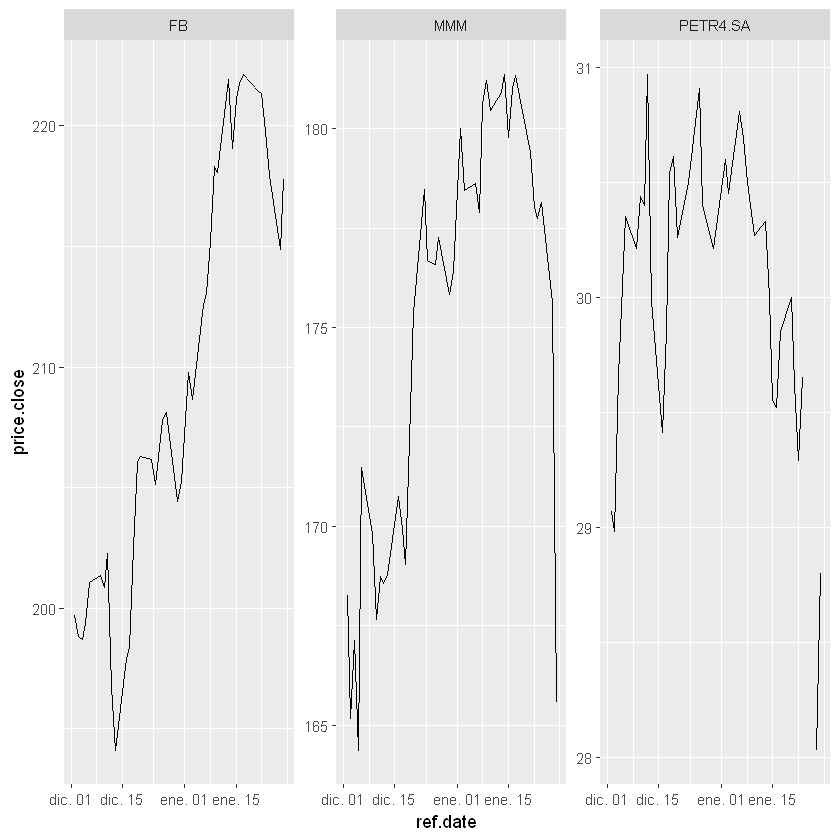

In [97]:
p <- ggplot(l.out$df.tickers, aes(x = ref.date, y = price.close))
p <- p + geom_line()
p <- p + facet_wrap(~ticker, scales = 'free_y') 
print(p)

# get.clean.data
# Get clean data from yahoo/google

In [65]:
#help("get.clean.data")

df.sp500 <- get.clean.data('^GSPC',
                           first.date = as.Date('2010-01-01'),
                           last.date = as.Date('2019-02-01'))
df.sp500

price.open,price.high,price.low,price.close,volume,price.adjusted,ref.date,ticker
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1116.56,1133.87,1116.56,1132.99,3991400000,1132.99,2010-01-04,^GSPC
1132.66,1136.63,1129.66,1136.52,2491020000,1136.52,2010-01-05,^GSPC
1135.71,1139.19,1133.95,1137.14,4972660000,1137.14,2010-01-06,^GSPC
1136.27,1142.46,1131.32,1141.69,5270680000,1141.69,2010-01-07,^GSPC
1140.52,1145.39,1136.22,1144.98,4389590000,1144.98,2010-01-08,^GSPC
1145.96,1149.74,1142.02,1146.98,4255780000,1146.98,2010-01-11,^GSPC
1143.81,1143.81,1131.77,1136.22,4716160000,1136.22,2010-01-12,^GSPC
1137.31,1148.40,1133.18,1145.68,4170360000,1145.68,2010-01-13,^GSPC
1145.68,1150.41,1143.80,1148.46,3915200000,1148.46,2010-01-14,^GSPC


# GetFTSE100Stocks 
Function to download the current components of the FTSE100 index from Wikipedia

This function scrapes the stocks that constitute the FTSE100 index from the wikipedia page at <https://en.wikipedia.org/wiki/FTSE_100_Index#List_of_FTSE_100_companies>.

In [66]:
df.FTSE100 <- GetFTSE100Stocks()
df.FTSE100
print(df.FTSE100$tickers)

company,tickers,ICB.sector
<chr>,<chr>,<chr>
3i,III,Financial Services
Admiral Group,ADM,Nonlife Insurance
Anglo American plc,AAL,Mining
Antofagasta,ANTO,Mining
Ashtead Group,AHT,Support Services
Associated British Foods,ABF,Food Producers
AstraZeneca,AZN,Pharmaceuticals & Biotechnology
Auto Trader Group,AUTO,Media
Aveva,AVV,Software & Computer Services


  [1] "III"  "ADM"  "AAL"  "ANTO" "AHT"  "ABF"  "AZN"  "AUTO" "AVV"  "AV." 
 [11] "BA."  "BARC" "BDEV" "BKG"  "BHP"  "BP."  "BATS" "BLND" "BT.A" "BNZL"
 [21] "BRBY" "CCL"  "CNA"  "CCH"  "CPG"  "CRH"  "CRDA" "DCC"  "DGE"  "EZJ" 
 [31] "EVR"  "EXPN" "FERG" "FLTR" "GSK"  "GLEN" "HLMA" "HL."  "HSBA" "HIK" 
 [41] "IMB"  "INF"  "IHG"  "IAG"  "ITRK" "ITV"  "JD."  "JMAT" "JE."  "KGF" 
 [51] "LAND" "LGEN" "LLOY" "LSE"  "MNG"  "MGGT" "MRO"  "MNDI" "MRW"  "NG." 
 [61] "NXT"  "NMC"  "OCDO" "PSON" "PSN"  "PHNX" "POLY" "PRU"  "RB."  "REL" 
 [71] "RTO"  "RIO"  "RMV"  "RR."  "RBS"  "RDSA" "RSA"  "SGE"  "SBRY" "SDR" 
 [81] "SMT"  "SGRO" "SVT"  "SN."  "SMDS" "SMIN" "SKG"  "SPX"  "SSE"  "STAN"
 [91] "SLA"  "STJ"  "TW."  "TSCO" "TUI"  "ULVR" "UU."  "VOD"  "WTB"  "WPP" 


# GetSP500Stocks 
# Function to download the current components of the SP500 index from Wikipedia

In [67]:
df.SP500 <- GetSP500Stocks()
df.SP500
print(df.SP500$Tickers)

Tickers,Company,SEC.filings,GICS.Sector,GICS.Sub.Industry,HQ.Location,Date.First.Added,CIK,Founded
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",,66740,1902
ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
AMD,Advanced Micro Devices Inc,reports,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932


  [1] "MMM"   "ABT"   "ABBV"  "ABMD"  "ACN"   "ATVI"  "ADBE"  "AMD"   "AAP"  
 [10] "AES"   "AFL"   "A"     "APD"   "AKAM"  "ALK"   "ALB"   "ARE"   "ALXN" 
 [19] "ALGN"  "ALLE"  "AGN"   "ADS"   "LNT"   "ALL"   "GOOGL" "GOOG"  "MO"   
 [28] "AMZN"  "AMCR"  "AEE"   "AAL"   "AEP"   "AXP"   "AIG"   "AMT"   "AWK"  
 [37] "AMP"   "ABC"   "AME"   "AMGN"  "APH"   "ADI"   "ANSS"  "ANTM"  "AON"  
 [46] "AOS"   "APA"   "AIV"   "AAPL"  "AMAT"  "APTV"  "ADM"   "ARNC"  "ANET" 
 [55] "AJG"   "AIZ"   "ATO"   "T"     "ADSK"  "ADP"   "AZO"   "AVB"   "AVY"  
 [64] "BKR"   "BLL"   "BAC"   "BK"    "BAX"   "BDX"   "BRK.B" "BBY"   "BIIB" 
 [73] "BLK"   "BA"    "BKNG"  "BWA"   "BXP"   "BSX"   "BMY"   "AVGO"  "BR"   
 [82] "BF.B"  "CHRW"  "COG"   "CDNS"  "CPB"   "COF"   "CPRI"  "CAH"   "KMX"  
 [91] "CCL"   "CAT"   "CBOE"  "CBRE"  "CDW"   "CE"    "CNC"   "CNP"   "CTL"  
[100] "CERN"  "CF"    "SCHW"  "CHTR"  "CVX"   "CMG"   "CB"    "CHD"   "CI"   
[109] "XEC"   "CINF"  "CTAS"  "CSCO"  "C"     "CFG"   "CTXS"  "C

# Ejemplos prácticos 

In [1]:
# Instalemos la libreria "readxl" 
#install.packages("readxl")
library(readxl)
library("FinCal")

Installing package into 'C:/Users/IN_CAP02/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\IN_CAP02\AppData\Local\Temp\RtmpUBRTAL\downloaded_packages


# Cálculo del VPN y la TIR

In [2]:
Wacc = 0.1419

datos.desde.xls  <- read_excel("Datos2.xlsx") 
datos.desde.xls

# Definimos esta variable como el flujo de caja del Proyecto 1
fcn=datos.desde.xls$`FCN`
fcn

New names:
* Depreciaciones -> Depreciaciones...6
* Depreciaciones -> Depreciaciones...16



Año,Ventas,Costos (Balance Personal),Utilidad marginal,Gastos (Mantenimiento),Depreciaciones...6,UAII,Intereses(16.5%),Utilidad antes de impuestos,Impuestos (25%),Utilidad Neta,Inversiones*,Amortizaciones,Préstamos,Venta de activos,Depreciaciones...16,FCN
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,653550,NA,98032.5,NA,NA,-555517.50
1,372000,275100,96900,9644,53153.33,34102.67,16175.363,17927.30,0.00,17927.30,0,19606.5,NA,0.000,53153.33,51474.14
2,405000,275100,129900,9644,53153.33,67102.67,12940.290,54162.38,13540.59,40621.78,120550,19606.5,NA,0.000,53153.33,-46381.38
3,405000,275100,129900,9644,53153.33,67102.67,9705.218,57397.45,14349.36,43048.09,4600,19606.5,NA,1533.333,53153.33,73528.25
4,405000,275100,129900,9644,53153.33,67102.67,6470.145,60632.52,15158.13,45474.39,0,19606.5,NA,0.000,53153.33,79021.22
5,405000,275100,129900,9644,53153.33,67102.67,3235.073,63867.59,15966.90,47900.70,258100,19606.5,NA,51620.000,53153.33,-125032.47


[1] -555517.50   51474.14  -46381.38   73528.25   79021.22 -125032.47

In [71]:
# Retorna el valor presente de el flujo de caja
pv.uneven(r = Wacc, cf = fcn2)
# Regresa la tasa interna de retorno del Proyecto 1
irr(fcn2)

[1] 450609.7

[1] -1.000105

# Cálculo del pago del préstamo 

In [72]:
# Comparación de dos estructuras de deuda utilizando la funcion PMT
#Estructura de 50% de prestamo y 50% financiamiento propio
pmt(r = 0.165, n = 5, pv = -326775, fv = 0, type=0)

[1] -100966.6

In [73]:
#Estructura de 15% de prestamo y 85% financiamiento propio.
pmt(r = 0.165, n = 5, pv = -98033, fv = 0, type=0)

[1] -30290.15

# Evaluación y selección de proyectos

In [74]:
#Importamos desde excel los flujos de efectivo de 3 diferentes proyectos.
#Cada proyecto tiene una distinta inversión inicial
datos.desde.xls3  <- read_excel("Proyectos.xlsx") 
datos.desde.xls3

#Cargamos los datos de cada Proyecto
PA=datos.desde.xls3$`PROYECTO A`
PA

PB=datos.desde.xls3$`PROYECTO B`
PB

PC=datos.desde.xls3$`PROYECTO C`
PC

AÑO,PROYECTO A,PROYECTO B,PROYECTO C
<dbl>,<dbl>,<dbl>,<dbl>
0,-1e+07,-2e+07,-1.6e+07
1,0e+00,4e+06,5.0e+06
2,6e+06,5e+06,8.0e+06
3,6e+06,6e+06,3.0e+06
4,8e+06,8e+06,3.0e+06


[1] -1e+07  0e+00  6e+06  6e+06  8e+06

[1] -2e+07  4e+06  5e+06  6e+06  8e+06

[1] -1.6e+07  5.0e+06  8.0e+06  3.0e+06  3.0e+06

In [75]:
#Valor presente neto de los tres proyectos dado una tasa de descuento.
VANPA=npv(0.07,PA)
VANPB=npv(0.07,PB)
VANPC=npv(0.07,PC)
VANPA
VANPB
VANPC

[1] 6241581

[1] -893539.6

[1] 397986.3

In [76]:
#Un inversionista puede comparar los diferentes proyectos para decidir en cual invertir
max(c(VANPA,VANPB,VANPC))

[1] 6241581

# Media ponderada del retorno de una cartera en especifico.


In [77]:
Retornos= c(0.4,0.7,0.9)
Portafolios = c(0.1, 0.4, 0.5)

wpr(r=Retornos, w=Portafolios)

[1] 0.77

# Simulacion proceso AR(1) sobre el precio de mercado de computadoras

Por ejemplo una compañia estudia la introduccion de un nuevo producto: computadoras

Entre los elementos de simulacion se pueden incluir:

Cantidad de unidades a producir

Precio de mercado

Costos unitarios de produccion

Costos unitarios de venta

Precio de compra de maquinaria para fabricar nuevo producto

Costo de capital



In [67]:
#Parametros

nSim=10000 #Numero de simulaciones
nT=10 #Numero de periodos del cashflow
tasa_desc=0.18 #Tasa de descuento (costo de capital)

In [68]:
#Funcion para calcular el cash flow

#q= cantidad ofertada
#p= precio de mercado del producto
#cp= costo unitario de produccion
#cv= costo unitario de ventas
#kT= cambio en el capital de trabajo
#ISR= tasa fiscal
#dep= depreciacion de maquinaria

cash_flow=function(q,p,cp,cv,kT,ISR,dep) {
    FCN = (q*p-q*(cv+cp)-dep)*(1-ISR)+dep-kT
    return(FCN) #Devuelve el cash flow de un periodo
}

In [69]:
#Como no podemos definir nuestro precio de mercado, se hace un proceso AR(1) 
#sobre el precio historico del producto

#Obtenemos de excel los precios historicos de computadoras 
#con una periodicidad mensual de febrero 1992 a noviembre 2019
#un total de 334 observaciones


Datos=read.csv("Precio_electronicos.csv")
#Definimos nuestro precio como todos los datos de la columna correspondiente a
#los precios de computadoras
Precio=Datos$A34HNO

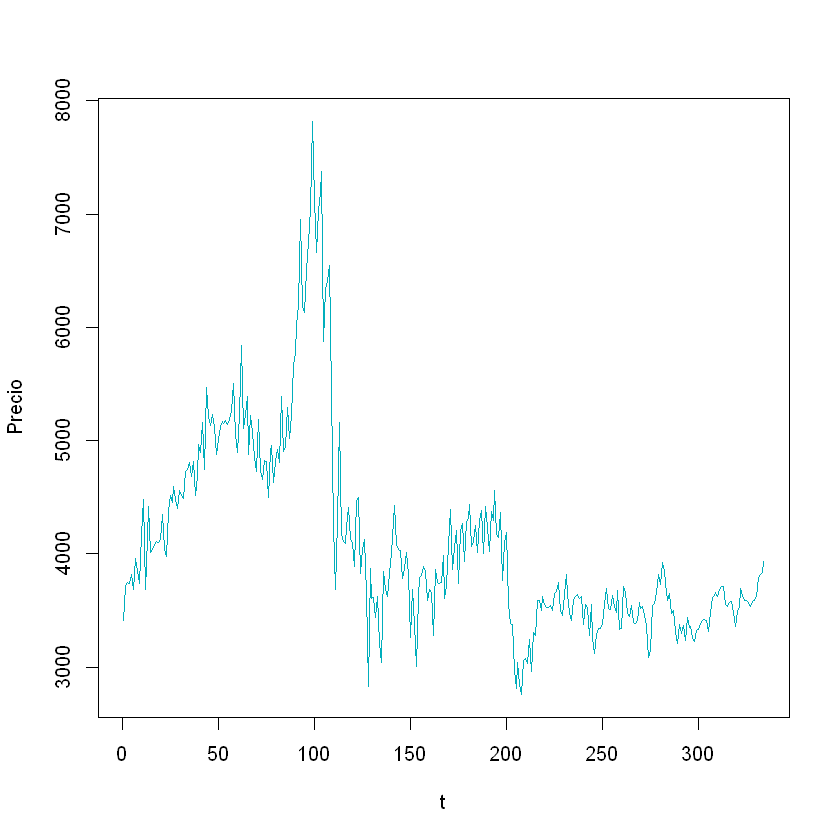

In [70]:
#Graficamos los precios de las computadoras
plot(Precio,type="l",xlab="t",col="#00aebc")

In [71]:
#Calculamos un AR(1)
Modelo_AR= ar.ols(Precio,aic=TRUE,order.max=1)
Modelo_AR


Call:
ar.ols(x = Precio, aic = TRUE, order.max = 1)

Coefficients:
     1  
0.9411  

Intercept: 1.603 (16.15) 

Order selected 1  sigma^2 estimated as  86861

In [72]:
#El modelo AR(1) de los precios es: Yt= intercepto + rho*Yt-1+epsilont

#Le damos el valor al intercepto del Modelo AR(1)
intercepto=Modelo_AR$x.intercept

#Le damos valor al coeficiente del Modelo AR(1)
rho=Modelo_AR$ar

#El numero de observaciones usadas para estimar el Modelo AR(1)
obs=Modelo_AR$n.obs

#Definimos a sigma del error como la desv estandar de los residuos
sigma=sd(Modelo_AR$resid[2:obs])

In [73]:
#Funcion para simular el precio de computadoras
simular_AR1=function(intercept,rho_sim){
    epsilon_sim=rnorm(1,mean=0,sd=sigma) #Simulamos epsilon
    y=intercept+rho_sim*Precio[obs]+epsilon_sim
    
    return(y)
}

Precio_sim=simular_AR1(intercepto,rho)
Precio_sim

, , 1

         [,1]
[1,] 3416.651

# SIMULACION DE VPNs DE DISTINTOS ESCENARIOS DEL PROYECTO 

In [74]:
#Vector vacio donde se van a guardar los VPNs
vec_vpn=rep(NaN,nSim)

#Vector vacio donde se van a guardar las diferentes inversiones iniciales
inv_inic= rep(NaN,nSim)

In [75]:
#Para cada simulacion
for (t in 1:nSim){
    #Sabemos que nuestra inversion inicial estara entre 100,000 y 1,000,000
    inv_inic[t]=sample(100000:1000000,1) #Simulamos la inversion inicial
    #Vector vacio en donde se va a guardar cada cashflow por el numero de periodos nT
    vec_cashflow=rep(NaN,nT)
    #El primer elemento del cashflow va a ser la inversion inicial pero en negativo
    vec_cashflow[1]=-inv_inic[t]
    #La depreciacion es el 20% de la inversion (maquinaria que vamos a comprar)
    depreciacion=-vec_cashflow[1]*0.2
    #El impuesto
    ISR=0.25
    for (i in 2:nT){
        #Simulamos las siguientes variables:
        #Sabemos que la cantidad del producto a ofertar va a estar entre 1,000 y 700 unidades al año
        q=cantidad=sample(100:700,1)
        #Sabemos el rango de nuestro cambio en el capital de trabajo
        ckt=cambio_Ktrabajo=sample(-2000:2000,1)
        #Como no podemos definir nuestro precio de mercado, se simula el precio de mercado
        p=simular_AR1(intercepto,rho)
        #Sabemos que nuestro costo unitario de produccion es el 60% del precio
        cp=costo_unitario_prod=0.60*p
        #Sabemos que nuestro costo unitario de venta es el 25% del precio
        cv=costo_unitario_venta=0.25*p
        #Cada cashflow se agrega al vector de cash flows de nT periodos
        vec_cashflow[i]=cash_flow(q,p,cp,cv,ckt,ISR,depreciacion)
    }
    #Se calcula el VPN para cada vector de cashflows para 10,000 simulaciones
    vec_vpn[t]=npv(r=tasa_desc,cf=vec_cashflow)
}

In [76]:
vec_vpn

[1]  148037.2682  240839.1719  592850.0867  344677.7582  455954.7105
    [6]  174295.8136  226473.2840   48163.3299  393157.4471   75501.0642
   [11]  475581.4820  714813.1282  441621.7465  200551.6752  668821.8077
   [16]  -53107.8222  216171.4211  336580.9709  340105.0070  337590.4759
   [21]  520525.3855  194563.2719  286875.2578  170505.4083  257854.0679
   [26] -303650.6366  285717.0630  627842.3278  279456.7702  159630.6803
   [31]  296155.0791  140311.3515  220206.3884  574473.2398  400968.3174
   [36]  448812.3584  611163.7969  637274.9520   33537.6108  103048.0711
   [41]   66715.0799  269841.4977  560165.7020  387225.9418  274251.9079
   [46]   97919.8631  455041.7998  352849.6942   93180.2499  396297.9787
   [51] -106709.8094  595924.9278  138074.1682  691647.8014  452000.8405
   [56]  419858.3589  301634.8909  664546.0281  376787.6625 -178746.5571
   [61]  153589.6870  640961.9017  208043.8902  268631.6593  286928.4212
   [66]   10151.6368   89797.8772  198296.7134   24967.3724  132136.0974
   [71]  380208.6956  637274.0637   70754.1943  277881.4581  680339.9209
   [76]  221598.3024  104092.2507  150376.1402  226903.1306  150767.0627
   [81]  107230.0634  470976.2921  427018.4601  319917.7705  346661.4153
   [86]  334496.7547  596180.7737  524810.2688  267292.0920  668761.5317
   [91] -271571.8697  438691.4450  159368.7473  398959.7694  564709.8112
   [96]  306348.3122  347342.0595  583435.0428  199486.8837   51653.1400
  [101] -130166.4509  119961.9566   66859.6543   85725.5626 -138993.5688
  [106]  466094.9947  214496.9141   32882.8429  342197.2914  -68458.8474
  [111]   37086.4495  575466.9335  375754.8952   92848.0401  162152.1850
  [116]  401292.2258  438637.6994  190711.0944  -19477.9959  464997.2584
  [121]  353948.4001  239733.3347  248680.2452  403593.1353  240807.9073
  [126]  839403.3052  592369.6525  410565.7695  414724.8988  153788.1054
  [131]  384912.1624  617897.4302  -81091.2734   45216.6249  330506.4102
  [136]  383384.2871  222263.8847   50676.7044  734259.1131 -122784.8634
  [141]  336657.0212   54629.9590  304399.2889   75520.9772  393783.2976
  [146]  317106.8161  105070.0469  362205.2300 -207936.9268  309255.7702
  [151]  268157.9711    3455.7975  -26341.7112  590838.4472  115045.8440
  [156]  536497.5597  528664.2781  473507.3132  214955.3207  387659.3006
  [161]  372403.0059  252924.8169  383779.1575  174825.0060  289321.4387
  [166]  206730.1357  560267.9391   40105.5814  467484.6549   97773.7288
  [171]  116882.0940  356145.6212  410594.7642  235423.6680  318995.9007
  [176]  123624.8638  424919.0301  684786.1009  371391.7887  651384.5032
  [181]  -16882.3246   43908.4472   61430.4967  180676.1345  205470.2841
  [186]  124879.8309  350545.6708  187512.3422  395675.1517  -38225.4245
  [191]  -19724.8350  631370.9358  747352.5894  322591.8438  571114.7676
  [196]  636243.4724 -101637.3031  152566.5211  480877.3848   95978.2360
  [201]  724621.8221  639759.2358  212597.6392  596402.2543   30633.1925
  [206]  304617.5959  543963.2902  478920.3229  495862.1078  122892.9621
  [211]  -16798.9054  704651.1322  433637.8625   42982.8822   96128.4550
  [216]  504474.2227  628483.3832  259119.0342  -26577.1995  -86412.3773
  [221]  174790.6609  165397.0071  650120.1767 -145706.0969  353542.8759
  [226]  699238.9365  455122.4439  -97235.9134  -10420.8894  159423.6084
  [231]  516315.3385  807870.4197  139722.1897  565105.7112  518177.0004
  [236]  150917.3211  262031.2051   -8099.5146 -208663.9743   48662.7594
  [241]  153042.9496    1868.6113  235927.3126  179497.5807  487468.6068
  [246]  259010.4065  312803.2137 -192171.9314  175295.4067  561873.5448
  [251]  -49941.1112  246718.0777   77565.1542 -211974.1326   74244.2419
  [256]  513453.8620  170786.2506 -146764.5968  -66485.4448  541072.7156
  [261]   67108.6565  183316.6095  574031.0395  830520.3579 -113274.7481
  [266]  695238.0229  458286.8748   14373.5723  312530.6780  114915.6157
  [271]  652252.2926  466973.9355  868814.7989  184461.1769   

[1] 280418.2

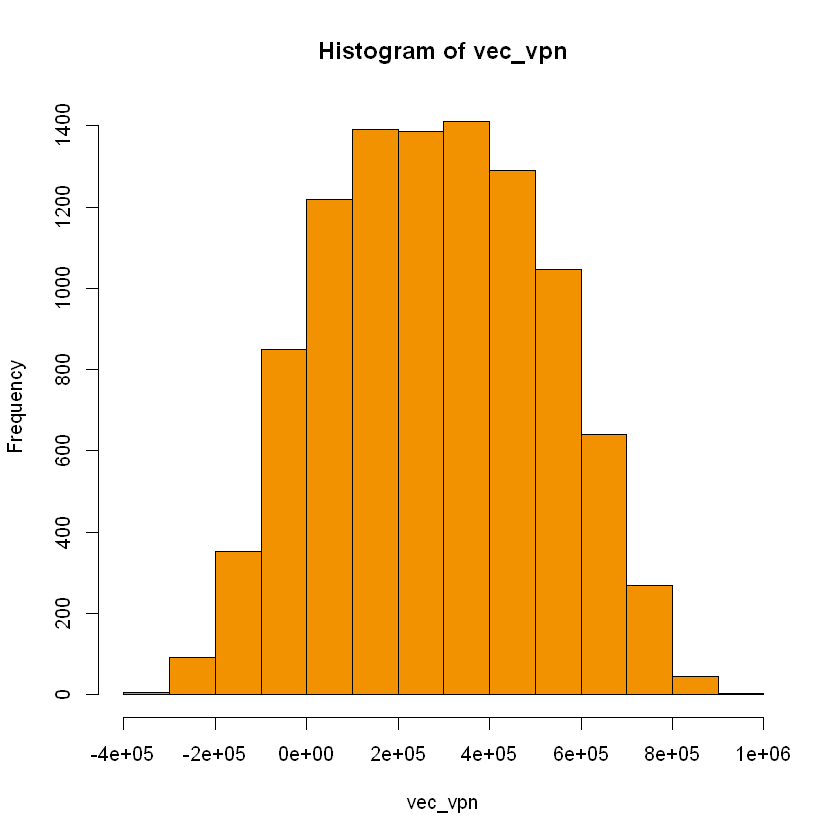

In [77]:
#Media de VPNs 
mean(vec_vpn)

#Graficamos la distribucion de los VPNs
hist(vec_vpn,col="#f39200")

In [78]:
#Vector vacio donde se va a guardar 1 si el VPN es positivo y 0 si es negativo
vec_prob=rep(NaN,nSim)

#Funcion de probabilidad que el VPN sea menor a un numero
Menor = function(a){
    for (i in 1:nSim) {
        if (vec_vpn[i] < a)
            vec_prob[i]=1
        else
            vec_prob[i]=0
    }
    Probabilidad = sum(vec_prob)/nSim
    return(Probabilidad)
}

#La probabilidad que el VPN sea negativo
Menor(0)

[1] 0.1301

In [79]:
#Funcion de probabilidad que el VPN sea mayor a un numero
Mayor = function(a){
    for (i in 1:nSim) {
        if (vec_vpn[i] > a)
            vec_prob[i]=1
        else
            vec_prob[i]=0
    }
    Probabilidad = sum(vec_prob)/nSim
    return(Probabilidad)
}

#La probabilidad que el VPN sea positivo
Mayor(0)

#La probabilidad que el VPN sea mayor a 500,000
Mayor(500000)


[1] 0.8699

[1] 0.2003

# EJEMPLO ANALISIS SENSIBILIDAD #
# Variable: Precio del Producto #

In [80]:
vec_vpn2=rep(NaN,nSim) #Creamos un vector que va a guardar todos los VPN por cada simulacion

inv_ini2=-sample(50000:200000,1) #Esta es la inversion inicial
q2=sample(100:700,1)
p2=simular_AR1(intercepto,rho)
cp2=0.60*p2 #Costo unitario de producción FIJO
cv2=0.25*p2 #Costo unitario por venta FIJO
ckt2=sample(-2000:2000,1) #Cambio de capital trabajo FIJO
depreciacion2=-inv_ini2*0.2 #Esta es la depreciacion de la maquinaria que se va a comprar con la inversion inicial
ISR=0.25

vec_precio=rep(NaN,nSim)

In [82]:
for (t in 1:nSim){
    vec_cashflow=rep(NaN,nT) #En este vector se guarda cada cashflow por la cantidad de periodos
    vec_cashflow[1]=-inv_ini2 #Valor inicial de la inversión
    vec_precio[t]=simular_AR1(intercepto,rho) #Vector de precios que se simulara para el analisis de sensibilidad
    
    for (i in 2:nT){
        
        #Agregamos al vector de cashflows el calculo del cashflow por cada periodo (nT)    
        vec_cashflow[i]=cash_flow(q2,vec_precio[t],cp2,cv2,ckt2,ISR,depreciacion2)
        
        
    }
    #Agregamos al vector de VPNs el calculo del VPN por cada vector de cashflow
    vec_vpn2[t]=npv(r=tasa_desc,cf=vec_cashflow)
    
}

In [83]:
vec_vpn2 #Cambios en el valor presente neto ante cambio en el precio

[1]  819696.0  948270.3  605405.5  733979.8  391115.0  541118.4  969699.3
    [8]  948270.3  991128.4  862554.1  669692.6  541118.4  412544.1  862554.1
   [15]  905412.2 1012557.4  733979.8  519689.3  733979.8  712550.7  562547.4
   [22]  348256.9 1033986.5  369686.0  819696.0  348256.9  948270.3  583976.5
   [29]  498260.3 1012557.4  862554.1  648263.6 1012557.4  348256.9  541118.4
   [36]  776837.9 1033986.5  498260.3  755408.8  991128.4  519689.3  905412.2
   [43]  991128.4  691121.7  798266.9  626834.6  476831.2  948270.3  541118.4
   [50]  412544.1  348256.9  733979.8  969699.3  776837.9  691121.7  498260.3
   [57]  476831.2  455402.2  733979.8  819696.0  412544.1  519689.3  819696.0
   [64]  669692.6  819696.0  605405.5  412544.1  969699.3  455402.2  991128.4
   [71]  905412.2  905412.2  691121.7  819696.0  391115.0  669692.6  712550.7
   [78]  391115.0  691121.7  583976.5  348256.9  348256.9  648263.6  691121.7
   [85]  905412.2  798266.9  883983.1  476831.2  798266.9  562547.4  391115.0
   [92]  498260.3  369686.0  519689.3  562547.4  733979.8  412544.1  498260.3
   [99]  648263.6  412544.1  348256.9  841125.0  391115.0  819696.0  283969.8
  [106]  969699.3  819696.0  819696.0  691121.7  948270.3  862554.1  626834.6
  [113]  883983.1  498260.3  348256.9  283969.8  798266.9  733979.8 1012557.4
  [120]  969699.3  455402.2  476831.2  391115.0  326827.9  541118.4  541118.4
  [127]  541118.4  391115.0  369686.0  755408.8  733979.8  819696.0  755408.8
  [134]  669692.6  391115.0  862554.1  712550.7  755408.8  798266.9  626834.6
  [141]  369686.0  648263.6  433973.1  498260.3  755408.8  926841.2  841125.0
  [148]  455402.2  948270.3  776837.9  391115.0  905412.2  326827.9  841125.0
  [155]  648263.6  626834.6  476831.2  326827.9  798266.9  948270.3  519689.3
  [162]  583976.5  755408.8  305398.8  605405.5  369686.0  841125.0  476831.2
  [169]  562547.4  519689.3  605405.5  369686.0  905412.2  498260.3  648263.6
  [176]  776837.9  433973.1  669692.6 1012557.4  969699.3  862554.1  348256.9
  [183]  326827.9  991128.4  498260.3  991128.4  926841.2  605405.5  455402.2
  [190]  305398.8  926841.2  476831.2  798266.9  541118.4  991128.4  926841.2
  [197]  819696.0  733979.8  798266.9  798266.9  712550.7  712550.7  755408.8
  [204]  519689.3  841125.0  969699.3  969699.3  691121.7  562547.4  626834.6
  [211] 1033986.5  305398.8  883983.1  498260.3  391115.0  776837.9  669692.6
  [218]  583976.5  776837.9  712550.7  412544.1  948270.3  841125.0 1012557.4
  [225]  669692.6 1012557.4  326827.9  841125.0  369686.0  562547.4  348256.9
  [232] 1033986.5  498260.3  905412.2  776837.9  969699.3  926841.2  862554.1
  [239]  305398.8  841125.0  969699.3  562547.4  283969.8  433973.1  819696.0
  [246]  969699.3  391115.0  841125.0  648263.6  948270.3  605405.5  326827.9
  [253]  455402.2  991128.4 1012557.4  969699.3  583976.5  519689.3  605405.5
  [260]  776837.9  798266.9  948270.3  841125.0  969699.3  733979.8  669692.6
  [267]  433973.1  691121.7  883983.1  326827.9  541118.4  326827.9  712550.7
  [274]  883983.1  776837.9  905412.2  305398.8  991128.4  283969.8  926841.2
  [281]  691121.7  583976.5  305398.8  905412.2  326827.9  541118.4  883983.1
  [288]  712550.7  991128.4  948270.3  519689.3  455402.2  391115.0  969699.3
  [295] 1033986.5  305398.8  991128.4  776837.9  455402.2  669692.6  369686.0
  [302]  562547.4  862554.1  776837.9  926841.2  712550.7  905412.2  926841.2
  [309]  605405.5  926841.2  305398.8  755408.8  326827.9  369686.0  326827.9
  [316] 1033986.5  519689.3  991128.4  283969.8  798266.9  562547.4  926841.2
  [323]  455402.2  948270.3  498260.3  626834.6  305398.8  691121.7  862554.1
  [330]  455402.2  541118.4  819696.0  605405.5  776837.9  541118.4  562547.4
  [337]  605405.5  326827.9  583976.5  948270.3  305398.8  926841.2  391115.0
  [344]  369686.0  519689.3 1012557.4  776837.9  905412.2  391115.0  476831.2
  [351]  991128.4  948270.3  948270.3  476831.2  412544.1  519689.3  348256.9
  [358]  776837.9 1033986.

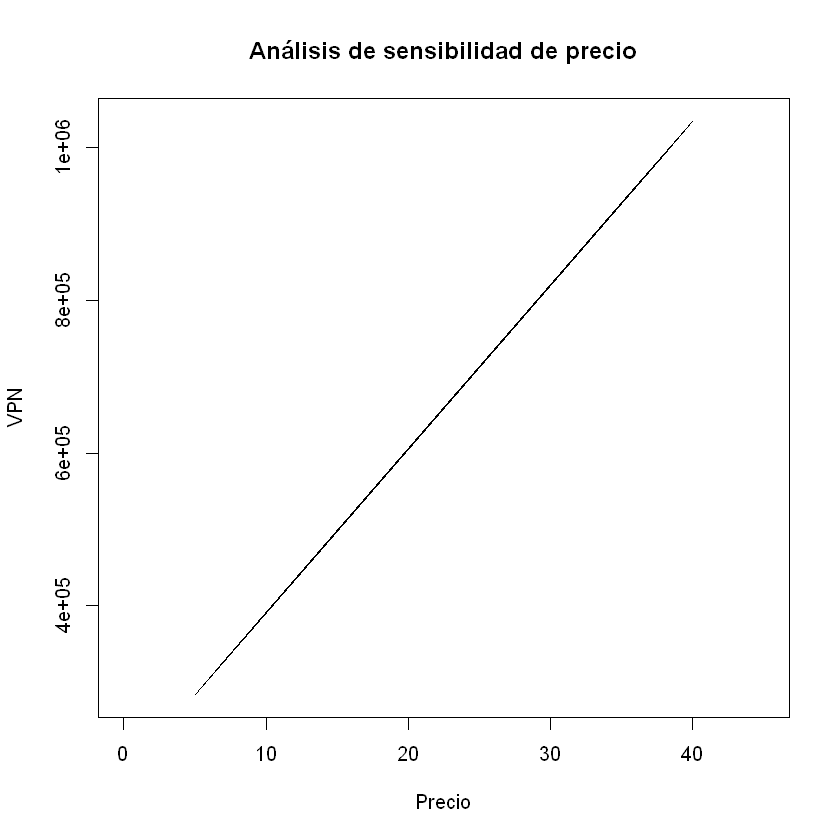

In [84]:
# Gráficas de sensibilidad de precios
x11();plot(vec_precio,vec_vpn2,type="l",xlim=c(2000,8000),xlab = "Precio",ylab="VPN", main = "Análisis de sensibilidad de precio")